# House Price Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
dataset = pd.read_csv("ParisHousing.csv")

In [3]:
dataset.head()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0


In [4]:
dataset.columns

Index(['squareMeters', 'numberOfRooms', 'hasYard', 'hasPool', 'floors',
       'cityCode', 'cityPartRange', 'numPrevOwners', 'made', 'isNewBuilt',
       'hasStormProtector', 'basement', 'attic', 'garage', 'hasStorageRoom',
       'hasGuestRoom', 'price'],
      dtype='object')

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   squareMeters       10000 non-null  int64  
 1   numberOfRooms      10000 non-null  int64  
 2   hasYard            10000 non-null  int64  
 3   hasPool            10000 non-null  int64  
 4   floors             10000 non-null  int64  
 5   cityCode           10000 non-null  int64  
 6   cityPartRange      10000 non-null  int64  
 7   numPrevOwners      10000 non-null  int64  
 8   made               10000 non-null  int64  
 9   isNewBuilt         10000 non-null  int64  
 10  hasStormProtector  10000 non-null  int64  
 11  basement           10000 non-null  int64  
 12  attic              10000 non-null  int64  
 13  garage             10000 non-null  int64  
 14  hasStorageRoom     10000 non-null  int64  
 15  hasGuestRoom       10000 non-null  int64  
 16  price              1000

In [6]:
#cheak the number of unique value
dataset.nunique()

squareMeters          9483
numberOfRooms          100
hasYard                  2
hasPool                  2
floors                 100
cityCode              9509
cityPartRange           10
numPrevOwners           10
made                    32
isNewBuilt               2
hasStormProtector        2
basement              6352
attic                 6267
garage                 901
hasStorageRoom           2
hasGuestRoom            11
price                10000
dtype: int64

C:\Users\Admin\AppData\Local\Temp\ipykernel_18088\1231049603.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['price'])


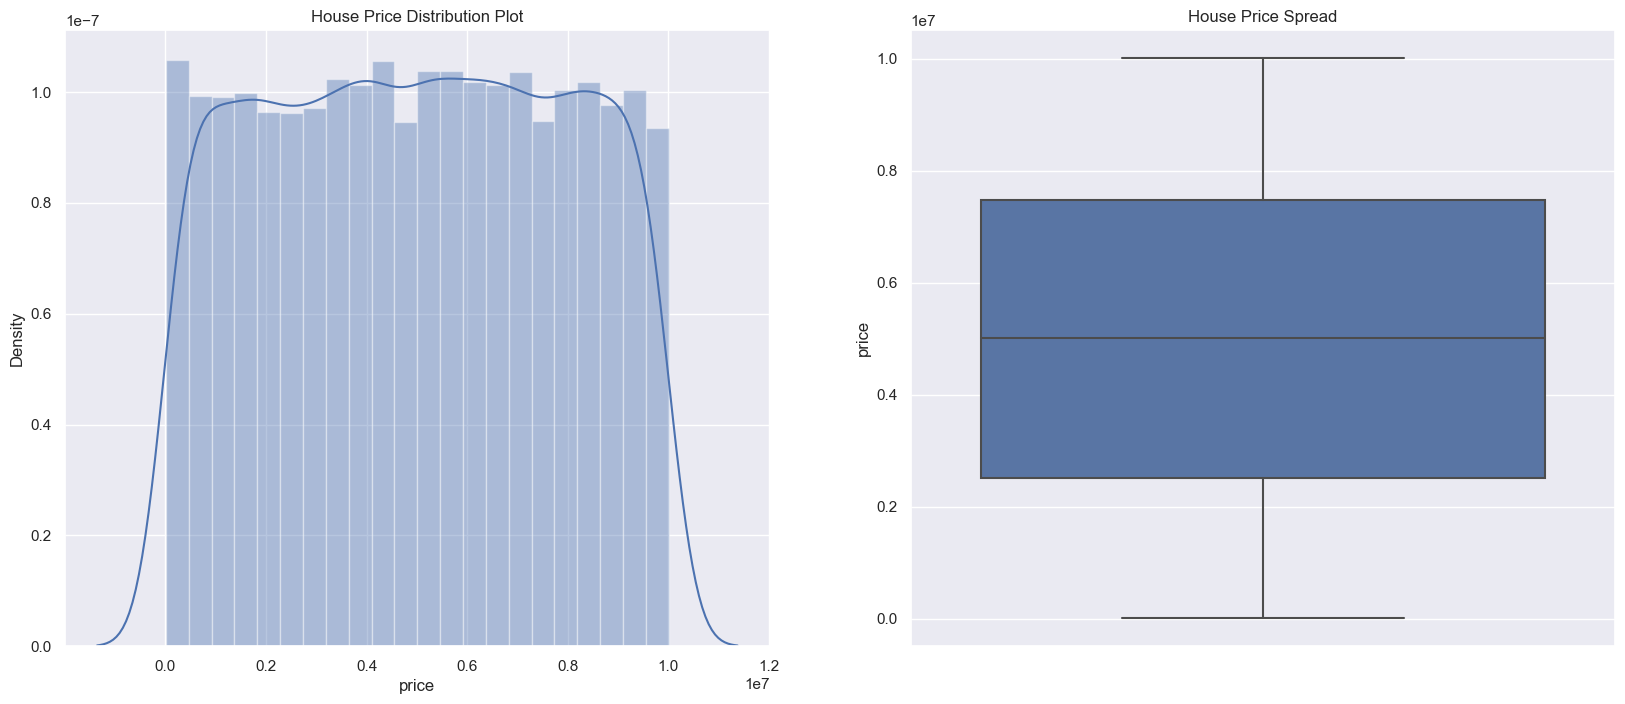

In [7]:
sns.set()
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('House Price Distribution Plot')
sns.distplot(dataset['price'])

plt.subplot(1,2,2)
plt.title('House Price Spread')
sns.boxplot(data = dataset , y='price')

plt.show()

# Corelation Between price and other columns

In [8]:
for i in dataset.columns:
    relation = dataset['price'].corr(dataset[i])
    print(i,' = ',relation)

squareMeters  =  0.9999993570640743
numberOfRooms  =  0.009590905935479111
hasYard  =  -0.006119244882540513
hasPool  =  -0.005070340833862476
floors  =  0.0016542562406505342
cityCode  =  -0.001539367348580777
cityPartRange  =  0.0088129116605353
numPrevOwners  =  0.016618826067943387
made  =  -0.007209526254689775
isNewBuilt  =  -0.010642774359518959
hasStormProtector  =  0.007495911334280622
basement  =  -0.003967482178851119
attic  =  -0.0005995140774963028
garage  =  -0.01722905120733807
hasStorageRoom  =  -0.003485299301379316
hasGuestRoom  =  -0.000643924104817499
price  =  1.0


In [9]:
correlation_matrix = dataset.corr()
correlation_matrix

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
squareMeters,1.000000,0.009573,-0.006650,-0.005594,0.001109,-0.001541,0.008758,0.016619,-0.007207,-0.010667,0.007480,-0.003960,-0.000588,-0.017246,-0.003486,-0.000623,0.999999
numberOfRooms,0.009573,1.000000,-0.011240,0.017015,0.022244,0.009040,0.008340,0.016766,0.003978,-0.002865,-0.001656,-0.013990,0.012061,0.023188,-0.004760,-0.015529,0.009591
hasYard,-0.006650,-0.011240,1.000000,0.015514,-0.000883,0.006760,0.005023,0.004279,0.002214,-0.008370,-0.007598,-0.008558,-0.003085,-0.004626,-0.009506,-0.007276,-0.006119
hasPool,-0.005594,0.017015,0.015514,1.000000,-0.004006,0.008072,0.014613,-0.006848,0.001894,0.000188,-0.001001,-0.007268,-0.011901,0.004832,0.001238,0.001123,-0.005070
floors,0.001109,0.022244,-0.000883,-0.004006,1.000000,0.002207,-0.004921,0.002463,0.005022,0.002458,-0.008566,0.006228,-0.000270,0.011303,0.003616,-0.021155,0.001654
cityCode,-0.001541,0.009040,0.006760,0.008072,0.002207,1.000000,0.011334,-0.007549,0.009266,-0.000224,-0.004941,0.002652,-0.002019,-0.002208,0.002554,-0.003338,-0.001539
cityPartRange,0.008758,0.008340,0.005023,0.014613,-0.004921,0.011334,1.000000,0.009238,0.007748,-0.001874,0.005224,0.004743,0.010696,-0.001648,-0.011338,-0.007153,0.008813
numPrevOwners,0.016619,0.016766,0.004279,-0.006848,0.002463,-0.007549,0.009238,1.000000,0.006858,-0.017420,0.002522,-0.000862,0.000719,0.020268,0.031707,-0.006082,0.016619
made,-0.007207,0.003978,0.002214,0.001894,0.005022,0.009266,0.007748,0.006858,1.000000,-0.001678,-0.000645,-0.005506,0.013773,0.005687,-0.007868,-0.005431,-0.007210
isNewBuilt,-0.010667,-0.002865,-0.008370,0.000188,0.002458,-0.000224,-0.001874,-0.017420,-0.001678,1.000000,0.003200,-0.015986,0.020127,0.002749,0.007011,0.019895,-0.010643


# Working With Catagorical Variable

In [10]:
Cat_var = ['hasYard','hasPool','cityPartRange','numPrevOwners','made','isNewBuilt','hasStormProtector','hasStorageRoom','hasGuestRoom']

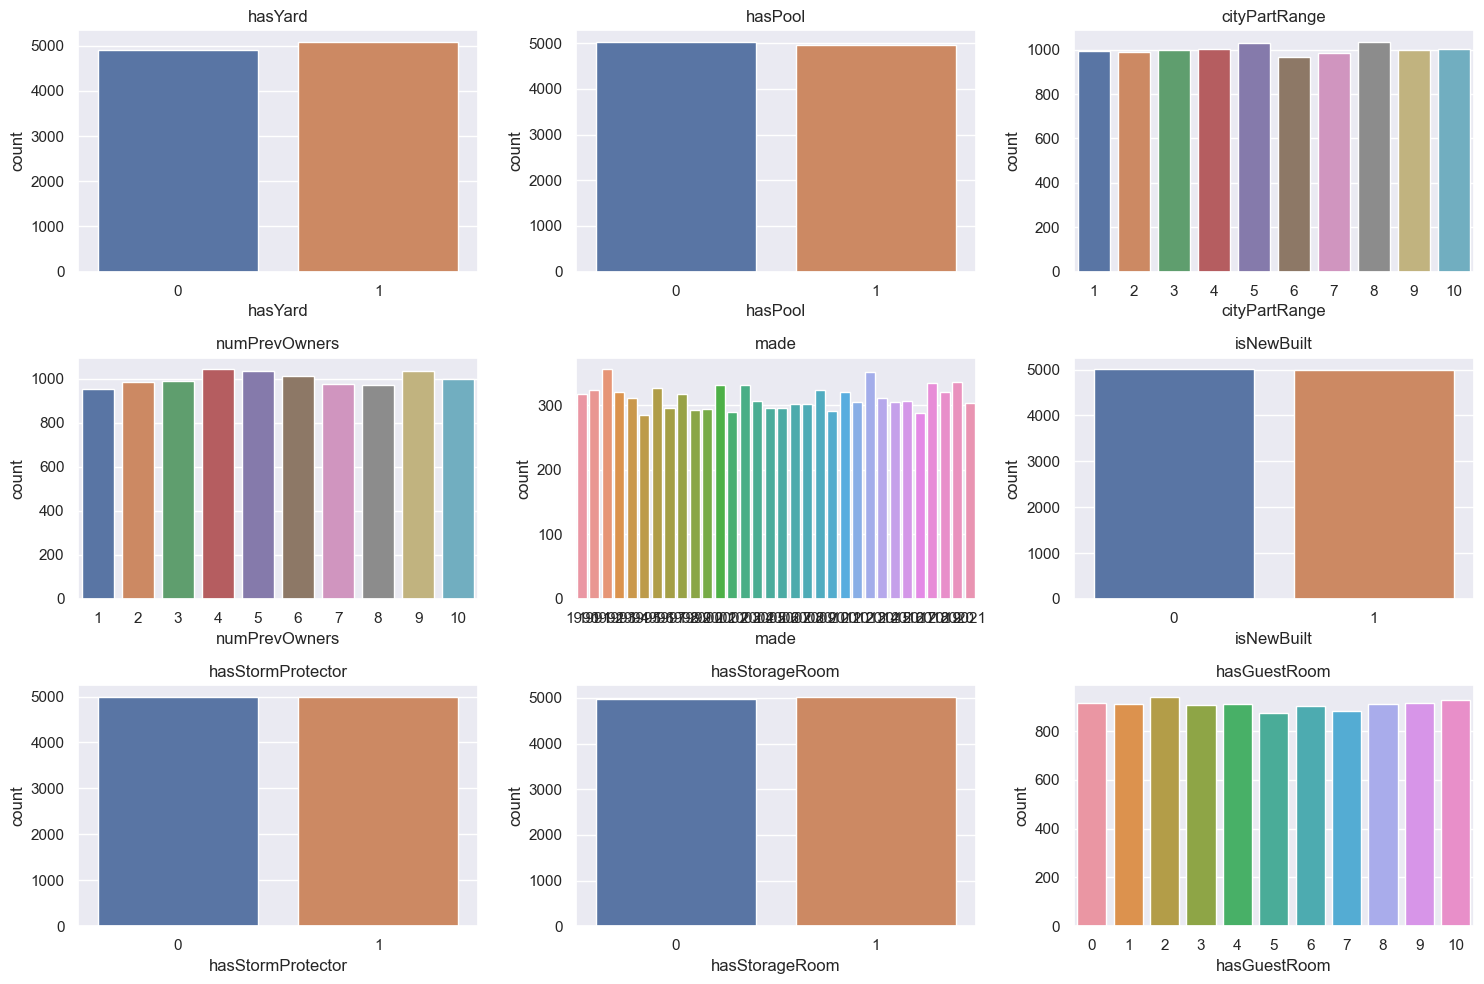

In [11]:
# Create subplots to display countplots for each categorical variable
plt.figure(figsize=(15, 10))  # Adjust the figure size as needed

for idx, var in enumerate(Cat_var):
    plt.subplot(3, 3, idx + 1)  # Create a 3x3 grid of subplots
    sns.countplot(data=dataset, x=var)
    plt.title(var)

plt.tight_layout()  # Ensure proper spacing between subplots
plt.show()

In [12]:
y = dataset[['price']]

In [13]:
x = dataset.drop(columns='price')

# Train Test Split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

# Applying Linear Model

In [15]:
model = LinearRegression()

In [16]:
model.fit(X_train, y_train)

LinearRegression()

In [17]:
y_pred = model.predict(X_test)

In [18]:
y_pred

array([[ 7962666.68090273],
       [ 3715887.21698724],
       [ 8553851.31540186],
       [ 6430565.24897487],
       [ 6465285.7152517 ],
       [  224224.46372785],
       [ 1619702.1210373 ],
       [ 8635557.75493137],
       [ 6192467.84246543],
       [ 3296160.85648709],
       [  550545.25927508],
       [ 8609827.54682048],
       [ 6774036.42372771],
       [  214787.05040379],
       [ 3691819.36249029],
       [ 7995821.27721397],
       [ 6020021.48017507],
       [ 2749127.38349588],
       [ 9046617.92867251],
       [ 1346434.68896231],
       [ 7299560.54726539],
       [  971194.38083641],
       [ 8057766.94109179],
       [ 6406633.09482861],
       [ 8395523.00944335],
       [ 7512669.04873008],
       [ 9725052.943659  ],
       [ 8966799.03900631],
       [ 8145640.13859847],
       [ 2962343.4688926 ],
       [ 1934575.08091332],
       [ 9997104.13429803],
       [ 5620264.84223862],
       [ 9175678.1706833 ],
       [ 8128654.79772395],
       [ 5231331.766

In [19]:
y_test

,price
6252,7964369.6
4684,3713548.9
1731,8553019.2
4742,6428666.2
4521,6465184.9
...,...
3921,2168225.7
6685,6922630.2
3194,3948983.3
1941,5371947.3


In [20]:
#Coefficient
print(model.coef_)

[[ 9.99999289e+01  4.04529249e-01  3.01433105e+03  2.97621922e+03
   5.45247934e+01 -8.26646412e-04  5.17065595e+01 -5.90243414e-01
  -2.68744056e+00  1.51204794e+02  1.32197867e+02 -6.81704818e-03
  -7.01793251e-03  1.07603944e-01  1.15284874e+01 -5.73805135e+00]]


In [21]:
#Intercept
print(model.intercept_)

[5700.54316784]


# Checking Accuracy

In [22]:
#Mean Absolute Error (MAE) :
#Lower MAE indicate better performance.
mae = mean_absolute_error(y_test, y_pred)
mae

1497.143245542242

In [23]:
#Mean Square Error :
#Lower MSE values indicate better performance.
mse = mean_squared_error(y_test, y_pred)
mse

3648827.320395196

In [24]:
#Root Mean Squared Error (RMSE) :
#Lower RMSE values indicate better performance.
rmse = np.sqrt(mse)
rmse

1910.1903885202637

In [25]:
#R-squared (R²) / Coefficient of Determination:
#Higher R² values indicate better performance.
r2 = r2_score(y_test, y_pred)
r2

0.9999995776276368